In [15]:
import base64
import collections
import datetime
import itertools
import json
import os
import operator
import pickle
import random
import re
import sys
import time

import matplotlib as mpl
import matplotlib.pyplot as plt
#import nltk
import numpy as np
import pandas as pd
#import PIL
import pylab
import scipy
import seaborn as sns
import sklearn
from sklearn import *
import statsmodels as sm
import xgboost as xgb

np.random.seed(1337)

%matplotlib inline

sns.set(font_scale=1.0)
mpl.rcParams['figure.figsize'] = 10, 6
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette('muted'))

In [16]:
# 3 Gaussians
m1 = 3.0
m2 = -2.0
m3 = 0.0

s1 = 0.5
s2 = 0.2
s3 = 1.2

n1 = 100
n2 = 100
n3 = 300

In [17]:
# the Gaussian distibution
def gaussian(x, mu, sig2):
    return (1.0 / np.power(2 * sig2 * np.pi, 0.5)) * np.exp(-(np.power(x - mu, 2.)) / (2.0 * sig2))

In [18]:
# get the Gaussian points to plot
ls = np.linspace(-4, 5, 200)
g1 = gaussian(ls, m1, s1) / 5.0
g2 = gaussian(ls, m2, s2) / 5.0
g3 = gaussian(ls, m3, s3) * 3.0 / 5.0
g = g1 + g2 + g3

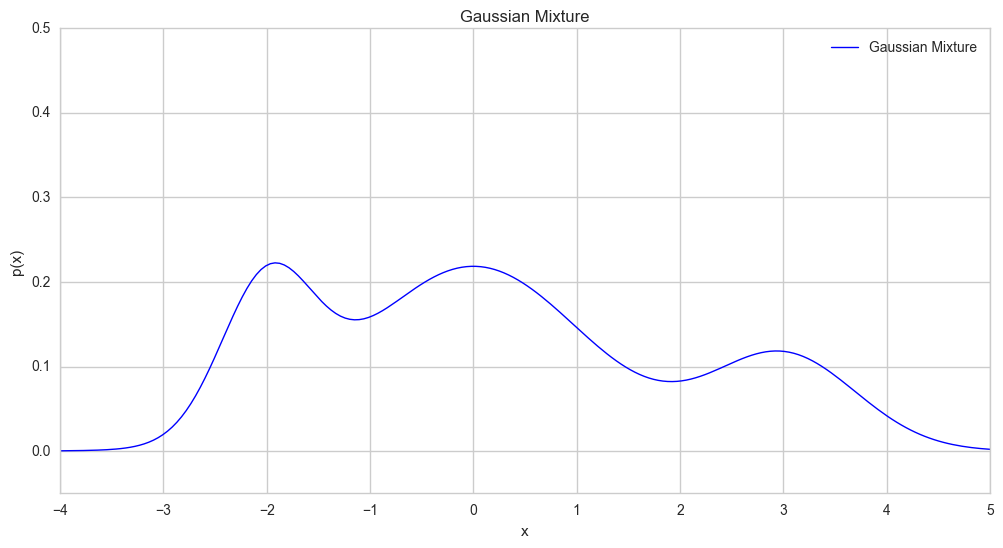

In [19]:
_ = plt.figure(figsize=(12, 6))

# plot the original gaussians
_ = plt.plot(
    ls,
    g,
    c='blue',
    linewidth=1,
    label='Gaussian Mixture')

_ = plt.xlim((-4, 5))
_ = plt.ylim((-0.05, 0.5))
_ = plt.title('Gaussian Mixture')
_ = plt.xlabel('x')
_ = plt.ylabel('p(x)')
_ = plt.legend()

In [20]:
# generate sample from the Gaussians
sample = np.concatenate([
        np.random.randn(n1) * s1 + m1,
        np.random.randn(n2) * s2 + m2,
        np.random.randn(n3) * s3 + m3])

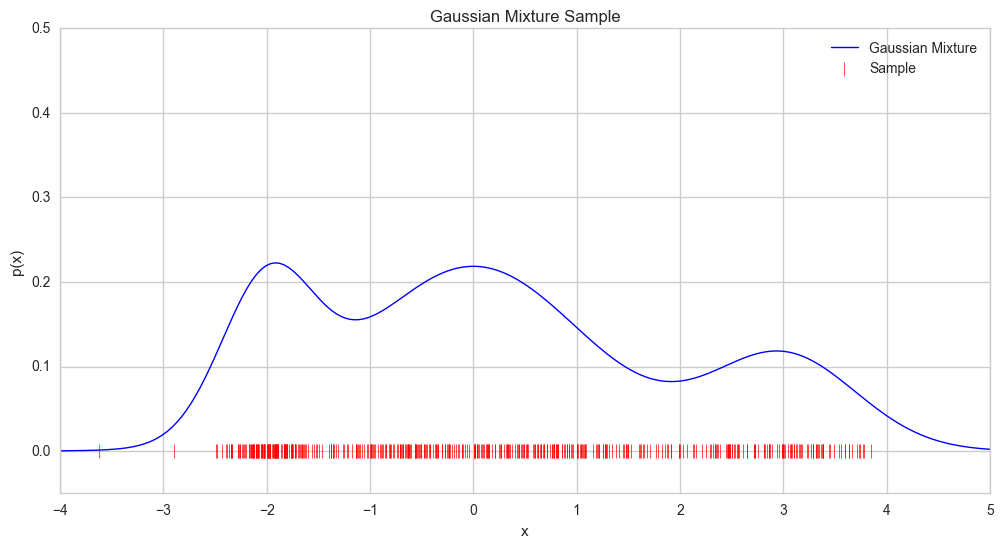

In [21]:
_ = plt.figure(figsize=(12, 6))

# plot the original gaussians
_ = plt.plot(
    ls,
    g,
    c='blue',
    linewidth=1,
    label='Gaussian Mixture')

# plot the sample
_ = plt.scatter(
    x=sample,
    y=[0]*len(sample),
    marker='|',
    c='red',
    s=100,
    label='Sample',
    linewidth=0.5)

_ = plt.xlim((-4, 5))
_ = plt.ylim((-0.05, 0.5))
_ = plt.title('Gaussian Mixture Sample')
_ = plt.xlabel('x')
_ = plt.ylabel('p(x)')
_ = plt.legend()

In [22]:
# kernel density estimations with different smoothing parameters
kde1 = np.exp(
        sklearn.neighbors.KernelDensity(
            bandwidth=0.05,
            kernel='gaussian')
        .fit(sample[:, np.newaxis])
        .score_samples(ls[:, np.newaxis]))

kde2 = np.exp(
        sklearn.neighbors.KernelDensity(
            bandwidth=0.4,
            kernel='gaussian')
        .fit(sample[:, np.newaxis])
        .score_samples(ls[:, np.newaxis]))

kde3 = np.exp(
        sklearn.neighbors.KernelDensity(
            bandwidth=1.5,
            kernel='gaussian')
        .fit(sample[:, np.newaxis])
        .score_samples(ls[:, np.newaxis]))

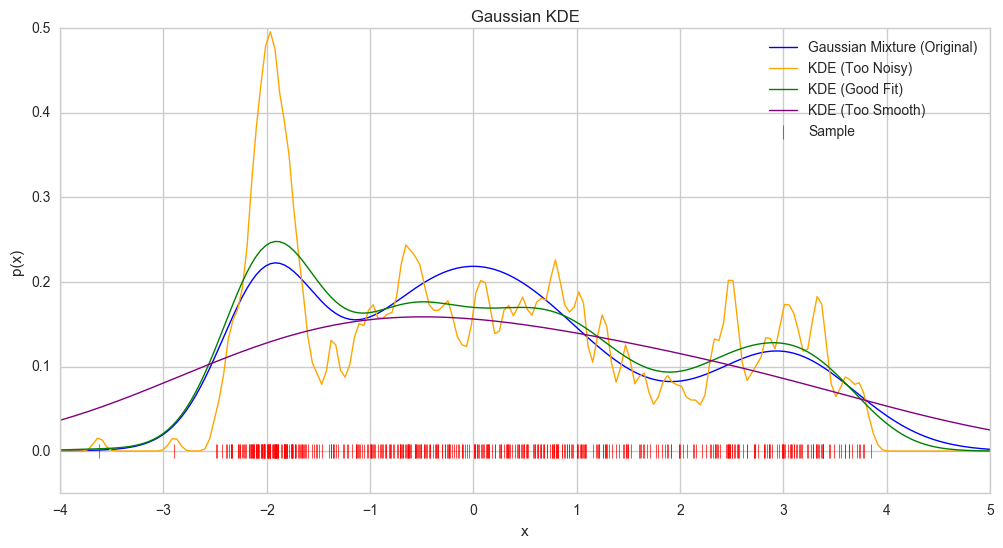

In [23]:
_ = plt.figure(figsize=(12, 6))

# plot the original gaussians
_ = plt.plot(
    ls,
    g,
    c='blue',
    linewidth=1,
    label='Gaussian Mixture (Original)')

# plot the sample
_ = plt.scatter(
    x=sample,
    y=[0]*len(sample),
    marker='|',
    c='red',
    s=100,
    label='Sample',
    linewidth=0.5)

# plot KDEs
_ = plt.plot(
    ls,
    kde1,
    c='orange',
    linewidth=1,
    label='KDE (Too Noisy)')

_ = plt.plot(
    ls,
    kde2,
    c='green',
    linewidth=1,
    label='KDE (Good Fit)')

_ = plt.plot(
    ls,
    kde3,
    c='purple',
    linewidth=1,
    label='KDE (Too Smooth)')

_ = plt.xlim((-4, 5))
_ = plt.ylim((-0.05, 0.5))
_ = plt.title('Gaussian KDE')
_ = plt.xlabel('x')
_ = plt.ylabel('p(x)')
_ = plt.legend()